In [42]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np;
import pandas as pandas;
from scipy import ndimage
from torchvision import datasets, transforms
from torch.distributions import normal
from torch.distributions import multivariate_normal
import matplotlib.pyplot as plt
import time

In [43]:
def createData(numberSamplesPerClass = 2, mean1 = [2, 2], mean2 = [26, 26], stds1 = [3, 3], stds2 = [2, 1]):
    """
    Creates the data to be used for training, using a GMM distribution
    @param numberSamplesPerClass, the number of samples per class
    @param mean1, means for samples from the class 1
    @param mean2, means for samples from the class 2
    @param stds1, standard deviation for samples, class 1
    @param stds2, standard deviation for samples, class 2    """
    means = torch.zeros(2)
    # Ones to concatenate for bias
    ones = torch.ones(numberSamplesPerClass, 1)
    means[0] = mean1[0]
    means[1] = mean1[1]
    # Covariance matrix creation with identity
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds1[0]
    covarianceMatrix[1, 1] = stds1[1]
    samplesClass1 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    means[0] = mean2[0]
    means[1] = mean2[1]
    covarianceMatrix[0, 0] = stds2[0]
    covarianceMatrix[1, 1] = stds2[1]
    samplesClass2 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    # Concatenates the ones for the bias
    samplesClass1Bias = torch.cat((ones, samplesClass1), 1)
    samplesClass2Bias = torch.cat((ones, samplesClass2), 1)
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    plt.scatter(samplesClass1[:, 0], samplesClass1[:, 1])
    plt.scatter(samplesClass2[:, 0], samplesClass2[:, 1], marker = 'x')
    plt.show()
    #Create samples without bias
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    
    #Create targets
    targetsClass1 = torch.ones(numberSamplesPerClass, 1)
    targetsClass2 = torch.zeros(numberSamplesPerClass, 1)
    targetsAll = torch.cat((targetsClass1, targetsClass2), 0)
    
    return (targetsAll, samplesAll)


'''
Creates data with gaussian distribution
'''
def createDataOneClass(means, covarianceMatrix, numberSamples):
    # Inits the bi gaussian data generator
    multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
    # Takes the samples
    samples = multiGaussGenerator.sample(torch.Size([numberSamples]))
    
    return samples

In [49]:

def evaluate_k_nearest_neighbors_observation(data_training, labels_training, test_observation, K = 3, is_euclidian = True):
    #TODO
    #We clone the data for better handling
    copy_data_training = torch.clone(data_training)
    #Create a column full of ones to append to the data training
    ones = torch.ones(data_training.shape[0], 1)
    #We append the column of ones
    distanced_data_training = torch.cat((copy_data_training, ones, ), 1)
    print("-------Training data with distances not available yet--------------")
    print(distanced_data_training)

    register = 0
    for train_point in data_training:
        #Get the euclidean distance of points
        dist = euclidean_dist(test_observation, train_point)
        #We round to 1 decimal
        dist = np.round(dist, 1)
        #We put the distances in the column of ones
        distanced_data_training[register, 2].mul_(dist)
        register += 1

    print("------------Training data With distances available....-------------")
    print(distanced_data_training)
    
    
    print("---------Distanced data training sorted....--------")
    # Sorts training points on the basis of distance
    sorted_values, sorted_index = torch.sort(distanced_data_training[:, 2]) 
    print("---------Sorted values....--------")
    print(sorted_values)
    print("---------Sorted index....--------")
    print(sorted_index)

    #Here we have k neighbors
    k_neighbors_values = sorted_values[:K] # selects k-nearest neighbors
    k_neighbors_index = sorted_index[:K] # selects k-nearest neighbors
    
    

    #Lets vote

    print("---------K NEAREST NEIGHBORS....--------")
    print(k_neighbors_values)
    print(k_neighbors_index)

    print("-----------Labels------------")
    k_labels = labels_training[k_neighbors_index]
    print(k_labels)
    #Here we get the most common category of the K nearest neighbors
    t_estimated = torch.mode(k_labels, 0).values.item()
    return t_estimated


def euclidean_dist(pointA, pointB):
    aux = pointA - pointB
    sumAux = aux.sum()
    distance = np.sqrt(sumAux ** 2)
    return distance


'''    
def evaluate_k_nearest_neighbors_test_dataset(data_training, labels_training, test_dataset, K = 7, is_euclidian = True):
    #TODO

def calculate_accuracy(test_estimations, test_labels):
    #TODO
        
'''    
    
    
    

'    \ndef evaluate_k_nearest_neighbors_test_dataset(data_training, labels_training, test_dataset, K = 7, is_euclidian = True):\n    #TODO\n\ndef calculate_accuracy(test_estimations, test_labels):\n    #TODO\n        \n'

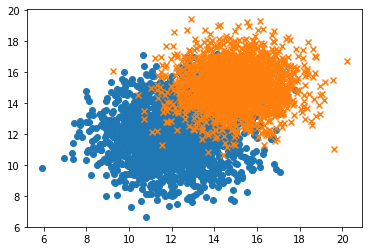

-------Training data with distances not available yet--------------
tensor([[10.9489, 14.1258,  1.0000],
        [12.1407, 13.2110,  1.0000],
        [15.2110, 15.0521,  1.0000],
        ...,
        [15.0951, 14.0083,  1.0000],
        [13.5881, 13.9737,  1.0000],
        [13.0089, 15.0330,  1.0000]])
------------Training data With distances available....-------------
tensor([[10.9489, 14.1258,  0.0000],
        [12.1407, 13.2110,  0.3000],
        [15.2110, 15.0521,  5.2000],
        ...,
        [15.0951, 14.0083,  4.0000],
        [13.5881, 13.9737,  2.5000],
        [13.0089, 15.0330,  3.0000]])
---------Distanced data training sorted....--------
---------Sorted values....--------
tensor([ 0.0000,  0.0000,  0.0000,  ..., 11.0000, 11.2000, 11.9000])
---------Sorted index....--------
tensor([1246, 1556, 1546,  ..., 3601, 2353, 2492])
---------K NEAREST NEIGHBORS....--------
tensor([0., 0., 0.])
tensor([1246, 1556, 1546])
-----------Labels------------
tensor([[1.],
        [1.],
    

In [50]:
"""
Main function
"""
def main():
    (TargetsAll, SamplesAll) = createData(numberSamplesPerClass = 2000, mean1 = [12,12], mean2 = [15, 15], stds1 = [3, 3], stds2 = [2, 2])    
    #print(TargetsAll)
    test_observation_1 = SamplesAll[0, :].unsqueeze(0)
    #print(test_observation_1)
    #Creamos esta observacion para ver que clase nos da, a simple vista pareciera ser de los azules
    #observation = torch.tensor([[9.8707,8.9192]])
    #print(observation)
    #example
    estimatedValue = evaluate_k_nearest_neighbors_observation(SamplesAll, TargetsAll, test_observation_1)
    print("The category value is ----->", estimatedValue)   
    #test_estimations_all = evaluate_k_nearest_neighbors_test_dataset(SamplesAll, TargetsAll, SamplesAll,  is_euclidian = False)
    #calculate accuracy
    #calculate_accuracy(test_estimations_all.unsqueeze(0).transpose(0, 1), TargetsAll)
    

    
main()

In [ ]:
x = torch.tensor([[ 9.4596, 12.6573,  1.0000],
        [11.8518, 15.0861,  1.0000],
        [ 9.2940, 13.3156,  1.0000],
        [14.6582, 16.7362,  1.0000],
        [18.1332, 15.0848,  1.0000],
        [15.4213, 17.2577,  1.0000]])
print(x)

print(x[torch.argsort(x[:, 1])])

tensor([[ 9.4596, 12.6573,  1.0000],
        [11.8518, 15.0861,  1.0000],
        [ 9.2940, 13.3156,  1.0000],
        [14.6582, 16.7362,  1.0000],
        [18.1332, 15.0848,  1.0000],
        [15.4213, 17.2577,  1.0000]])
tensor([[ 9.4596, 12.6573,  1.0000],
        [ 9.2940, 13.3156,  1.0000],
        [18.1332, 15.0848,  1.0000],
        [11.8518, 15.0861,  1.0000],
        [14.6582, 16.7362,  1.0000],
        [15.4213, 17.2577,  1.0000]])
